# Import packages

In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import shap
import spacy
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import torch
import transformers
import shap
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import joblib

In [2]:
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda:1")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 4 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-32GB


# Load data and model

## Function to load data and model

In [3]:
# Function to load the model  
def load_data_and_model(data_path, hub_path):
    # Load data
    data = pd.read_csv(data_path)
    data = data[['Sentence','Label']]
    # Remove duplicates
    data.drop_duplicates(subset=['Sentence'], inplace=True)
    # Rename columns
    data.columns = ['text', 'target']
    # Rename FLS labels
    data['target'] = data['target'].replace({'FLS': 1, 'Not FLS': 0})
    # Load model and tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(hub_path).to(device)
    tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased',do_lower_case=True)
    return data, model, tokenizer    

# Interpret models

In [4]:
# Predict function for SHAP
def predict(texts):
    input = torch.tensor(
        [tokenizer.encode(text,padding='max_length', truncation=True, max_length=512)
        for text in texts]
    ).to(device)
    #input = input.unsqueeze(0)
    outputs = model(input)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    return scores[:,1] # Return the probability of the positive class

In [5]:
# Function to explain the model with SHAP
def shap_interpret_model(data, model, tokenizer, n_samples=None):
    # filter out non-FLS sentences
    data = data[data['target'] == 1]
    # Get a sample of the data 
    if n_samples is not None:
        if len(data) > n_samples:
            sample = data.sample(n_samples, random_state=42)
            sample = sample.reset_index(drop=True)
        else:
            sample = data    
    
    # Get the explainer
    explainer = shap.Explainer(predict, tokenizer)
    
    # Get the shap values
    shap_values = explainer(sample['text'], fixed_context=1)
    
    # Plot the shap values
    shap.plots.bar(shap_values.abs.mean(0), max_display=11)
    
    return shap_values

# Run through all data and their corresponding models

## DistilBERT

In [6]:
import requests

--------------INTERPRETING DISTILBERT-FLS--------------


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
PartitionExplainer explainer:   1%|          | 7/1000 [00:15<14:18,  1.16it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▏         | 22/1000 [00:35<13:48,  1.18it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   7%|▋         | 72/1000 [01:36<16:41,  1.08s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (542 > 512). Running this sequence through the model will result in indexing errors


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 77/1000 [01:46<19:02,  1.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   8%|▊         | 81/1000 [02:01<50:52,  3.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  14%|█▎        | 135/1000 [03:04<14:43,  1.02s/it] 

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  15%|█▍        | 149/1000 [03:28<11:44,  1.21it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  18%|█▊        | 179/1000 [04:12<11:44,  1.17it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  21%|██        | 209/1000 [04:51<12:41,  1.04it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  23%|██▎       | 227/1000 [05:19<12:08,  1.06it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  23%|██▎       | 228/1000 [05:31<56:35,  4.40s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  26%|██▌       | 255/1000 [06:12<10:41,  1.16it/s]  

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  26%|██▌       | 259/1000 [06:25<22:22,  1.81s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  35%|███▍      | 349/1000 [08:11<11:16,  1.04s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  36%|███▌      | 357/1000 [08:33<21:47,  2.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  36%|███▌      | 362/1000 [08:45<20:19,  1.91s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  37%|███▋      | 366/1000 [08:56<20:31,  1.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  37%|███▋      | 369/1000 [09:07<26:41,  2.54s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  38%|███▊      | 384/1000 [09:27<09:49,  1.04it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|███▉      | 397/1000 [09:46<12:57,  1.29s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  43%|████▎     | 430/1000 [10:25<10:09,  1.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  44%|████▍     | 441/1000 [10:58<10:31,  1.13s/it]  

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  44%|████▍     | 442/1000 [11:04<23:46,  2.56s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  45%|████▍     | 447/1000 [11:16<16:45,  1.82s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  52%|█████▏    | 519/1000 [13:04<07:15,  1.10it/s]  

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  55%|█████▌    | 553/1000 [13:45<06:37,  1.12it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  56%|█████▋    | 564/1000 [14:05<09:12,  1.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  59%|█████▊    | 586/1000 [14:40<12:56,  1.88s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  59%|█████▉    | 594/1000 [14:51<06:33,  1.03it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  64%|██████▍   | 643/1000 [15:58<04:59,  1.19it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  67%|██████▋   | 666/1000 [16:36<05:36,  1.01s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  68%|██████▊   | 682/1000 [16:58<05:34,  1.05s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  72%|███████▏  | 715/1000 [17:41<05:29,  1.16s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  77%|███████▋  | 770/1000 [18:38<02:40,  1.44it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  79%|███████▉  | 788/1000 [19:00<02:46,  1.27it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  82%|████████▏ | 816/1000 [19:36<03:21,  1.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  85%|████████▍ | 846/1000 [20:13<01:50,  1.40it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  87%|████████▋ | 867/1000 [20:44<02:13,  1.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  88%|████████▊ | 878/1000 [21:01<01:50,  1.10it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  92%|█████████▏| 915/1000 [21:53<01:10,  1.21it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  92%|█████████▏| 916/1000 [22:00<03:32,  2.53s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  98%|█████████▊| 976/1000 [23:01<00:22,  1.09it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 1001it [23:38,  1.42s/it]                          


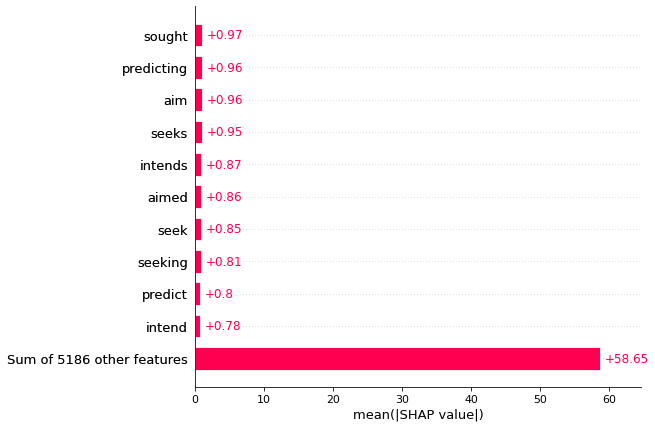

['../models/distilbert-fls_shap-values.pkl']

In [7]:
print("--------------INTERPRETING DISTILBERT-FLS--------------")
data_path = '../datasets/distilbert_dataset.csv'
hub_path = 'lenguyen/distilbert-fls'


# Load data and model
data, model, tokenizer = load_data_and_model(data_path, hub_path)

# Explain the model
shap_values = shap_interpret_model(data, model, tokenizer, n_samples=1000)

# Save shap values
joblib.dump(shap_values, '../models/distilbert-fls_shap-values.pkl')

## FinBERT

--------------INTERPRETING FINBERT-FLS--------------


PartitionExplainer explainer:   3%|▎         | 30/1000 [00:46<32:50,  2.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   4%|▍         | 41/1000 [01:05<20:21,  1.27s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  27%|██▋       | 272/1000 [06:52<14:50,  1.22s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  44%|████▍     | 445/1000 [11:29<15:33,  1.68s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  49%|████▉     | 493/1000 [12:37<14:16,  1.69s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  54%|█████▎    | 537/1000 [13:46<12:34,  1.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  57%|█████▊    | 575/1000 [14:46<10:23,  1.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  62%|██████▏   | 624/1000 [16:01<05:41,  1.10it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  66%|██████▌   | 656/1000 [16:56<11:22,  1.98s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  86%|████████▌ | 859/1000 [22:00<03:49,  1.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  90%|████████▉ | 899/1000 [23:05<02:13,  1.32s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  94%|█████████▍| 938/1000 [24:02<01:01,  1.01it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 1001it [25:49,  1.56s/it]                          


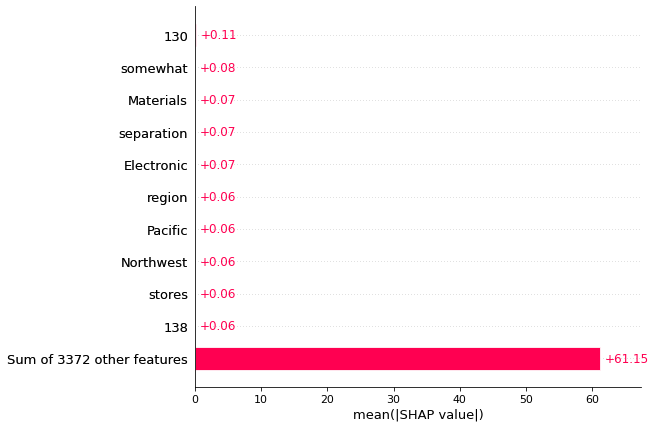

['../models/finbert-fls_shap-values.pkl']

In [8]:
print("--------------INTERPRETING FINBERT-FLS--------------")
data_path = '../datasets/finbert_dataset.csv'
hub_path = 'lenguyen/finbert-fls'


# Load data and model
data, model, tokenizer = load_data_and_model(data_path, hub_path)

# Explain the model
shap_values = shap_interpret_model(data, model, tokenizer, n_samples=1000)

# Save shap values
joblib.dump(shap_values, f'../models/finbert-fls_shap-values.pkl')

In [14]:
# Save sample data
data = pd.read_csv('../datasets/finbert_dataset.csv')
data = data[['Sentence','Label']]
# Remove duplicates
data.drop_duplicates(subset=['Sentence'], inplace=True)
# Rename columns
data.columns = ['text', 'target']
# Rename FLS labels
data['target'] = data['target'].replace({'FLS': 1, 'Not FLS': 0})
# Filter out non-FLS sentences
data = data[data['target'] == 1]
# Save sample data
data = data.sample(1000, random_state=42)
data.to_csv('../datasets/finbert-fls_data_sample.csv', index=False)

## Sample sentences

In [10]:
# Load shap values
fb_shap = joblib.load('../models/finbert-fls_shap-values.pkl')

130

In [15]:
shap.plots.text(fb_shap[286])

somewhat

In [18]:
shap.plots.text(fb_shap[783])

In [19]:
shap.plots.text(fb_shap[950])

Electronic, Materials and separation

In [20]:
shap.plots.text(fb_shap[665])

region, Pacific, Northwest

In [22]:
shap.plots.text(fb_shap[81])

stores

In [24]:
shap.plots.text(fb_shap[777])

138

In [26]:
shap.plots.text(fb_shap[195])